# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset** 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### **Loading the data**

In [10]:
# Importing the csv and checking the head.
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Data Overview**

*Observations*
- There are 8 variables. 7 should be numeric and 1 should be text (and should probably be removed for later analysis).
  
*Sanity checks*
- Need to check column data types to ensure all are numeric.
- Need to check for missing values. If there are any, they should be replaced with median as it is unaffected by outliers.s
- Need to check for duplicated rows. If any, they should be removed.


In [13]:
# Checking overall structure.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [15]:
# Renaming column model year to model_year for easier manipulation
df = df.rename(columns={"model year": "model_year"})

In [17]:
# Checking for null values.
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
car name        0
dtype: int64

In [19]:
# Checking for duplicated rows.
df.duplicated().sum()

0

In [21]:
# Checking summary statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



In [23]:
# All data is numeric except horsepower and car name. As horsepower should logically be numeric, we need to check if the data is all numeric. 
horsepower_numeric = df['horsepower'].apply(str.isnumeric).all()
print (f"Are all the values in horsepower numeric? {horsepower_numeric}")

Are all the values in horsepower numeric? False


In [25]:
# Finding the non-numeric values.
non_numeric_values = df[~pd.to_numeric(df['horsepower'], errors='coerce').notna()]
non_numeric_values

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car name
32,25.0,4,98.0,?,2046,19.0,71,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,amc concord dl


In [27]:
# The data needs to be modified. Creating a copy to preserve the original as is best practice.
df_original = df.copy()

# Replacing ? with NaN.
df = df.replace('?', np.nan)

# Converting column to float.
df['horsepower'] = df['horsepower'].astype('float64')

In [29]:
# Finding median of horsepower.
df.horsepower.median()

93.5

In [31]:
# Checking if column data type has been changed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [33]:
# Replacing NaN with median horsepower for later PCA.
df = df.replace(np.nan, 93.5)
check = df[df['horsepower'] == 93.5]
check

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car name
32,25.0,4,98.0,93.5,2046,19.0,71,ford pinto
126,21.0,6,200.0,93.5,2875,17.0,74,ford maverick
330,40.9,4,85.0,93.5,1835,17.3,80,renault lecar deluxe
336,23.6,4,140.0,93.5,2905,14.3,80,ford mustang cobra
354,34.5,4,100.0,93.5,2320,15.8,81,renault 18i
374,23.0,4,151.0,93.5,3035,20.5,82,amc concord dl


### **Summary Statistics**

### **Univariate Analysis**

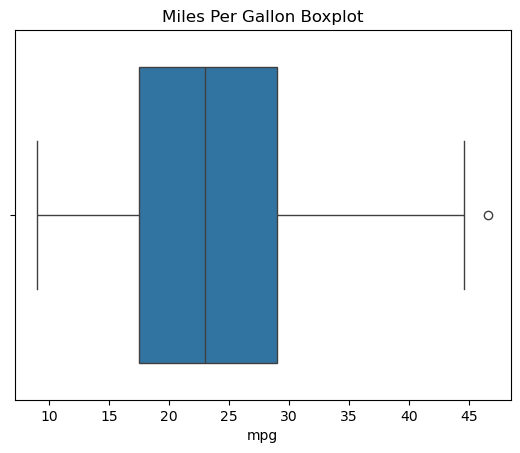

In [35]:
# Boxplot for miles per gallon.
sns.boxplot(data = df, x = 'mpg')
plt.title('Miles Per Gallon Boxplot')
plt.xlabel('mpg');

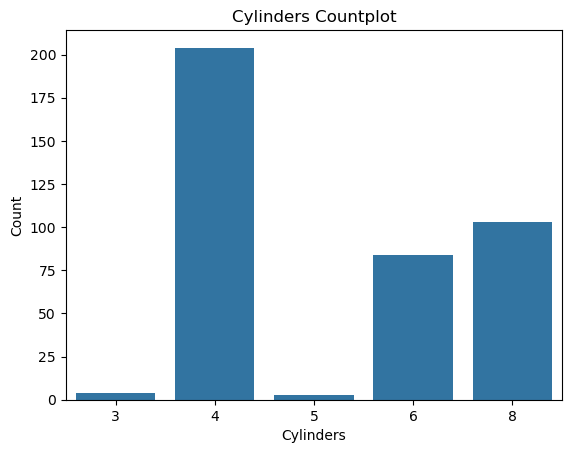

In [37]:
# Countplot for cylinders.
sns.countplot(data = df, x = 'cylinders')
plt.title('Cylinders Countplot')
plt.xlabel('Cylinders')
plt.ylabel('Count');

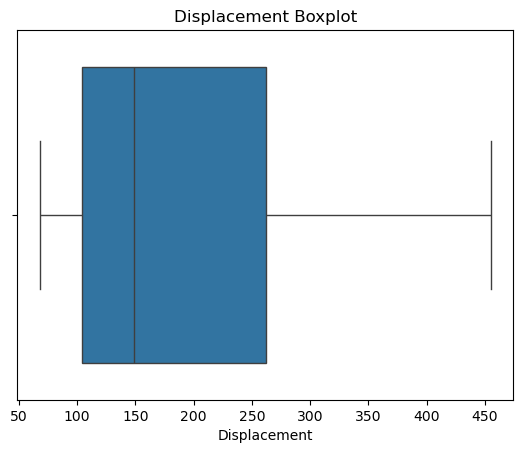

In [39]:
# Boxplot for displacement.
sns.boxplot(data = df, x = 'displacement')
plt.title('Displacement Boxplot')
plt.xlabel('Displacement');

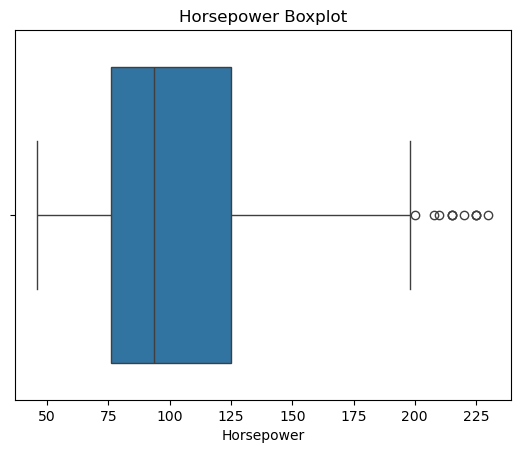

In [41]:
# Boxplot for displacement.
sns.boxplot(data = df, x = 'horsepower')
plt.title('Horsepower Boxplot')
plt.xlabel('Horsepower');

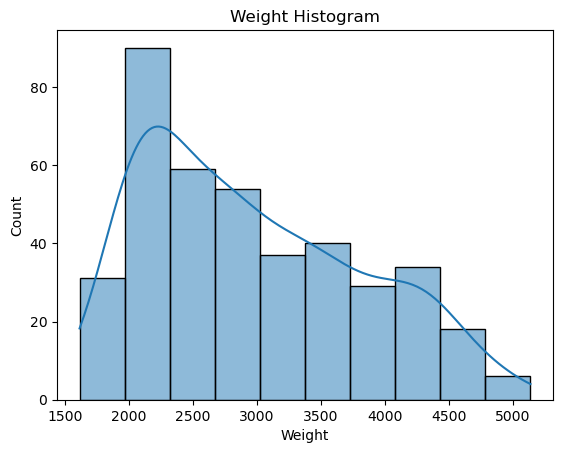

In [43]:
# Histogram for weight.
sns.histplot(data = df, x = 'weight', kde = True, bins = 10);
plt.title('Weight Histogram')
plt.xlabel('Weight');

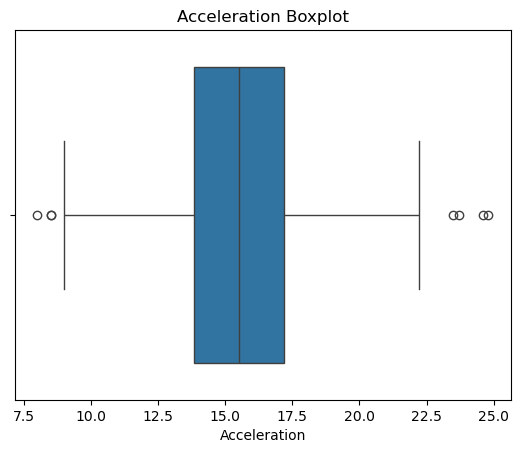

In [45]:
# Boxplot for acceleration.
sns.boxplot(data = df, x = 'acceleration')
plt.title('Acceleration Boxplot')
plt.xlabel('Acceleration');

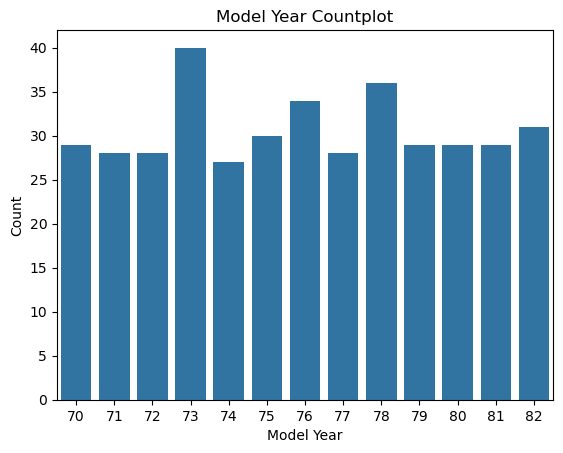

In [49]:
# Countplot for cylinders.
sns.countplot(data = df, x = 'model_year')
plt.title('Model Year Countplot')
plt.xlabel('Model Year')
plt.ylabel('Count');

**Observations:**
- mpg: Slightly right skewed but mostly symmetrical. One outlier.
- cylinders: Majority of cars have 4 cylinders. Next most common is 8, then 6 (all even numbers, which makes sense).
- displacement: Right skewed, no outliers.
- horsepower: Right skewed, few outliers.
- weight: Right skewed.
- acceleration: Symmetrical, outliers on both sides.
- model year: Ranged from '70 to '82, fairly even distribution.

### **Multivariate Analysis**

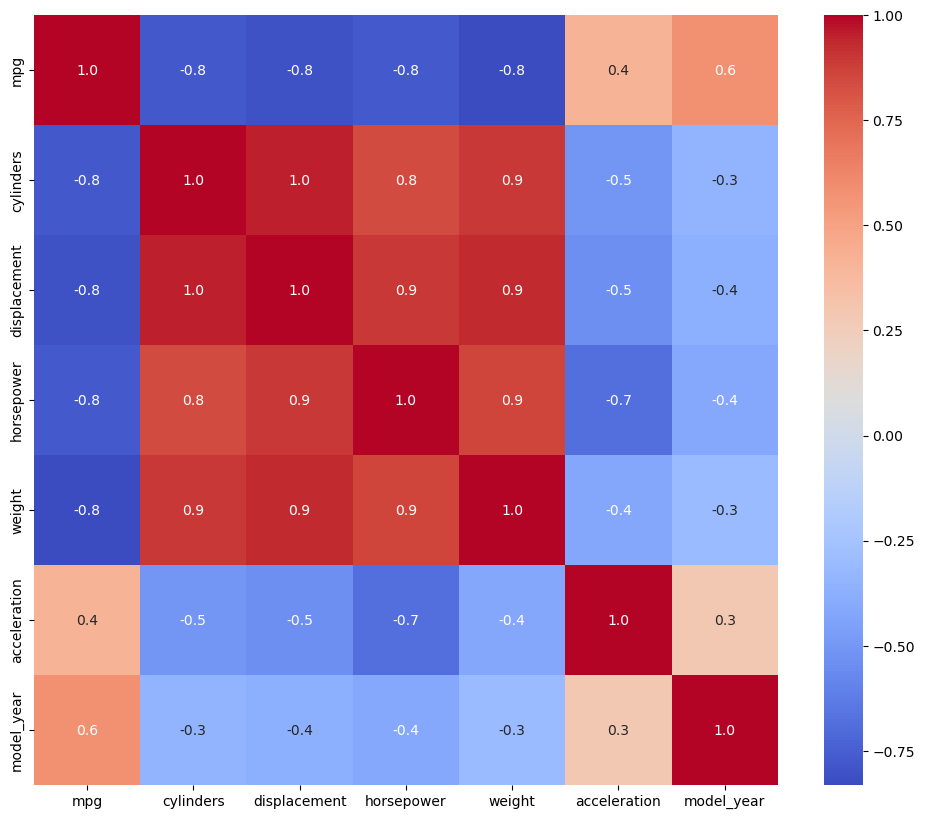

In [137]:
# Checking correlations between numeric variables.
numeric_variables = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']
corr = df[numeric_variables].corr()

# Plotting the heatmap.
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',            
        fmt = '.1f',            
        xticklabels = corr.columns,            
        yticklabels = corr.columns);

**Observations:**
- Strong positive correlations between:
    - Cylinders & displacement, horsepower, and weight
    - Displacement & horsepower and weight
    - Horsepower & weight
- Strong negative correlations between:
    - mpg & cylinders, displacement, horsepower, and weight
    - horsepower & acceleration
- By imagining the attributes of a muscle car vs an economical car, these correlations pass the sense check.

### **Scaling the data**

In [53]:
# Dropping "car name" as it is not numeric.
df = df.drop('car name', axis=1)

In [55]:
# Scaling the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns = df.columns)

# Checking if data has been scaled.
scaled_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**

In [57]:
# Creating PCA object and df.
pca = PCA(n_components = scaled_df.shape[1], random_state = 1)
scaled_df_pca = pd.DataFrame(pca.fit_transform(scaled_df))
explained_variances =  pca.explained_variance_ratio_

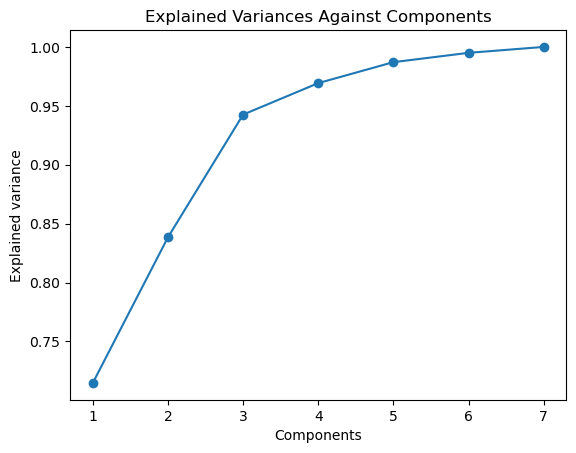

In [59]:
# Plotting number of components against variance explained.
plt.plot(range(1, 8), explained_variances.cumsum(), marker = 'o')
plt.title('Explained Variances Against Components')
plt.xlabel('Components')
plt.ylabel('Explained variance')
plt.show();

In [61]:
# Creating table showing percentage of variance explained by each principal component.
primary_components = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
explained_variances_df = pd.DataFrame(explained_variances.cumsum()*100, index = primary_components)
explained_variances_df = explained_variances_df.map(lambda x: f"{x:.2f}%")
explained_variances_df

,0
PC1,71.48%
PC2,83.84%
PC3,94.26%
PC4,96.93%
PC5,98.71%
PC6,99.50%
PC7,100.00%


**Observations:**
- The first 3 principal components account for nearly 95% of the explained variance. After that, there seems to be diminishing returns of adding more principal components. For example, going from PC2 to PC3 represents an increase of approximately 11%, but going from PC3 to PC4 only represents an extra 3% increase. As such, the first three principal components should be examined.

#### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [63]:
first_3_primary_components = ['PC1', 'PC2', 'PC3']
data_pca = pd.DataFrame((pca.components_[:3,:]), index = first_3_primary_components, columns = scaled_df.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.397737,-0.211430,-0.256579
cylinders,0.416485,-0.191612,0.140786
displacement,0.429713,-0.177428,0.103649
horsepower,0.422311,-0.090327,-0.168064
weight,0.414224,-0.221956,0.279668
acceleration,-0.284828,0.024110,0.892645
model_year,-0.229428,-0.910548,-0.018109


**Observations:**
- PC1: Seems to be related to cylinders, displacement, horsepower, weight. This brings to mind a muscle car which would score high in these elements, and appropriately score low in mpg (-0.4)
- PC2: Seems to be related to model year of the car. This factor is likely to differentiate cars as cars made at different times would likely have different attributes.
- PC3: Seems to be related most to acceleration. A car with high acceleration is also likely to have more unique characteristics.

#### **Visualize the data in 2 dimensions using the first two principal components**



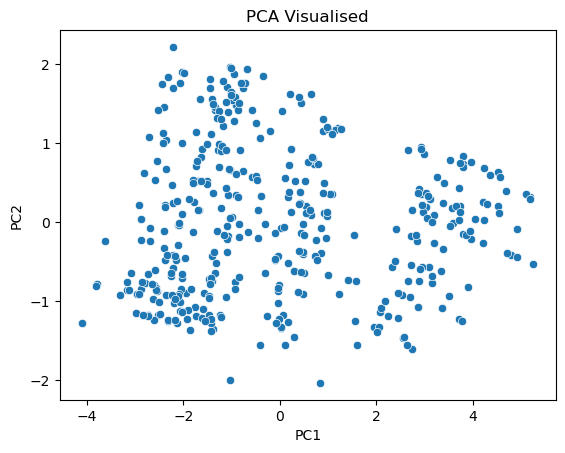

In [65]:
sns.scatterplot(x = scaled_df_pca[0], y = scaled_df_pca[1])
plt.title('PCA Visualised')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Observations:**
- There do not seem to be any distinguishable groups. As such, it makes sense to follow up with t-SNE to try to identify groups.

## **t-SNE**

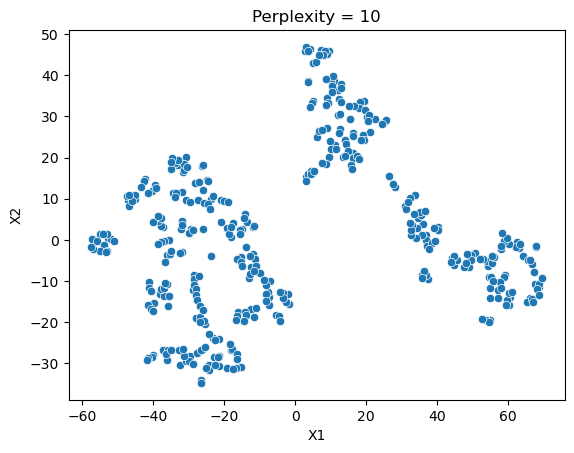

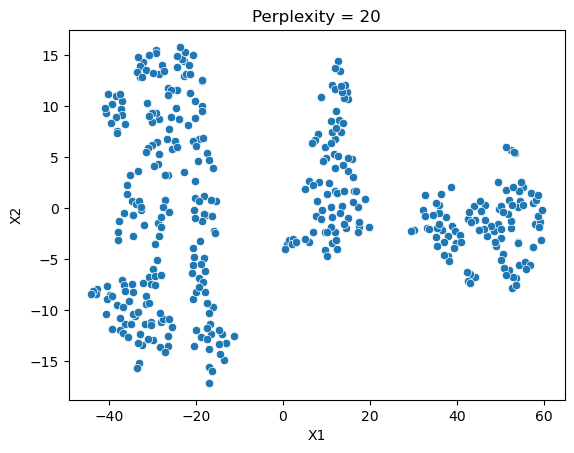

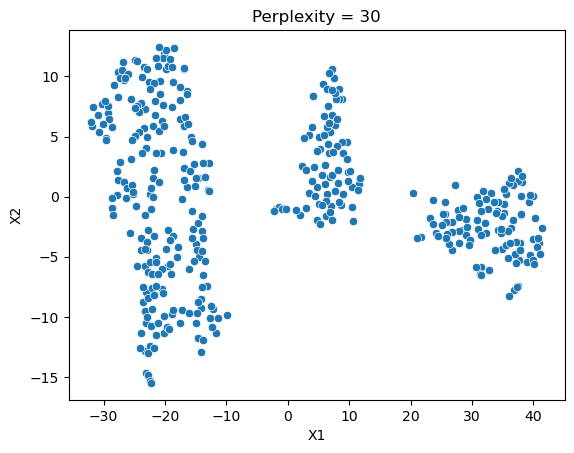

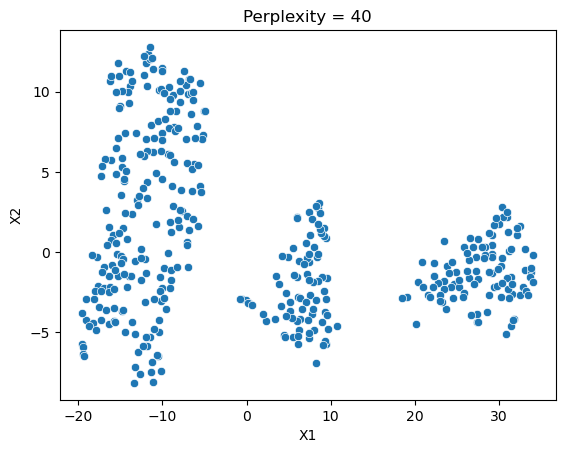

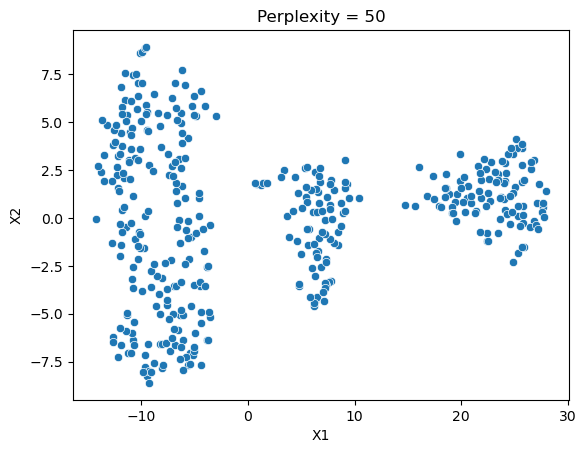

In [97]:
# Visualising t-SNE with different perplexity values (10, 20, 30, 40, 50) using a for loop.
for i in range(10, 51, 10):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    scaled_df_tsne = tsne.fit_transform(scaled_df)
    scaled_df_tsne = pd.DataFrame(scaled_df_tsne)
    scaled_df_tsne.columns = ['X1', 'X2']
    plt.figure()
    sns.scatterplot(x = 'X1', y = 'X2', data = scaled_df_tsne)
    plt.title(f"Perplexity = {i}")

In [143]:
# t-SNE with perplexity 30 does a good job of separating the three clusters while balancing global and local structures. Creating a new t-SNE with this perplexity.
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 30)
scaled_df_tsne = tsne.fit_transform(scaled_df)
scaled_df_tsne = pd.DataFrame(scaled_df_tsne, columns = ['X1', 'X2'])

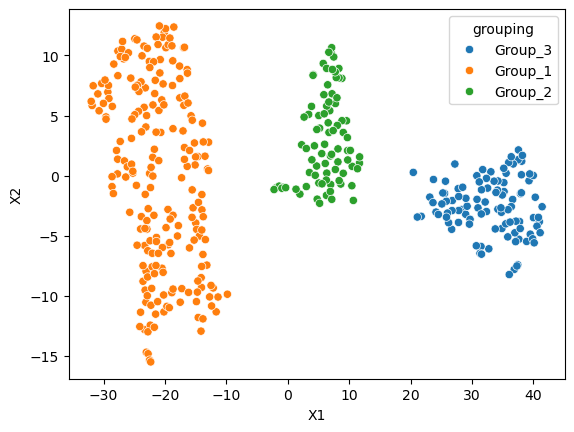

In [145]:
# Creating a grouping function, applying it to the chosen t-SNE, and visualising results.
def grouping(x):
    if x['X1'] < -7:
        return 'Group_1'
    elif x['X1'] > -7 and x['X1'] < 15: 
        return 'Group_2'
    else: 
        return 'Group_3'
scaled_df_tsne['grouping'] = scaled_df_tsne.apply(grouping, axis = 1)
sns.scatterplot(x = 'X1', y = 'X2', data = scaled_df_tsne, hue = 'grouping');

**Observations:**
- A perplexity of 30 seems to be most effective in creating three distinct groupings while maintaining global and local structures.
- The three distinct clusters are separated mainly along X1.
- Most cars seem to be in Group 1. Group 2 and Group 3 have similar numbers.

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

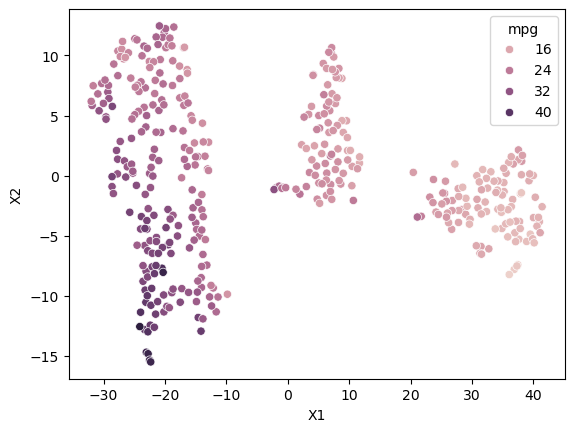

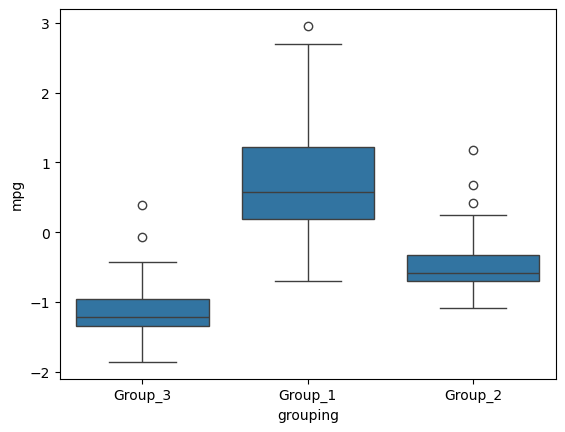

In [117]:
# Visualising clusters using scatterplot and boxplot with regards to mpg.
plt.figure()
sns.scatterplot(x = 'X1', y = 'X2', data = scaled_df_tsne, hue = df.mpg)
plt.figure()
sns.boxplot(x = scaled_df_tsne['grouping'], y = scaled_df['mpg']);

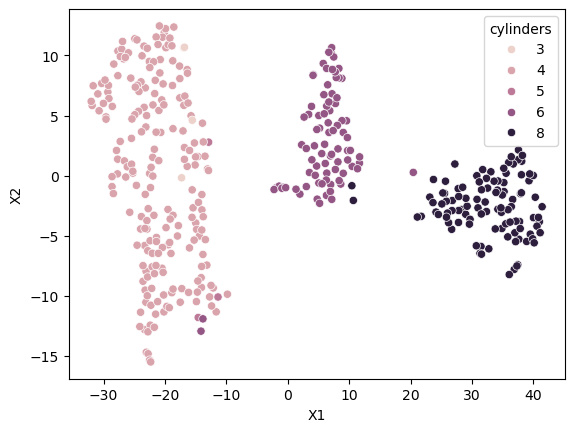

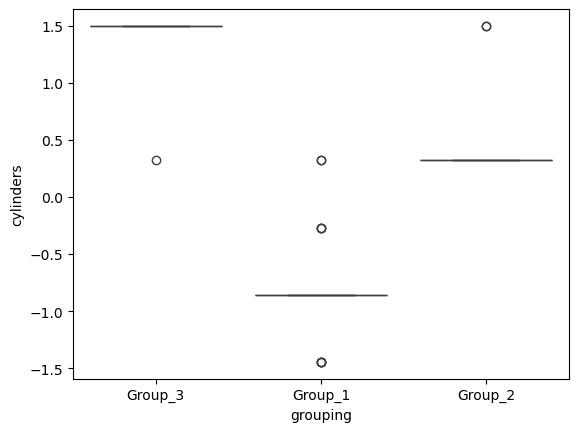

In [119]:
# Visualising clusters using scatterplot and boxplot with regards to cylinders.
plt.figure()
sns.scatterplot(x = 'X1', y = 'X2', data = scaled_df_tsne, hue = df.cylinders)
plt.figure()
sns.boxplot(x = scaled_df_tsne['grouping'], y = scaled_df['cylinders']);

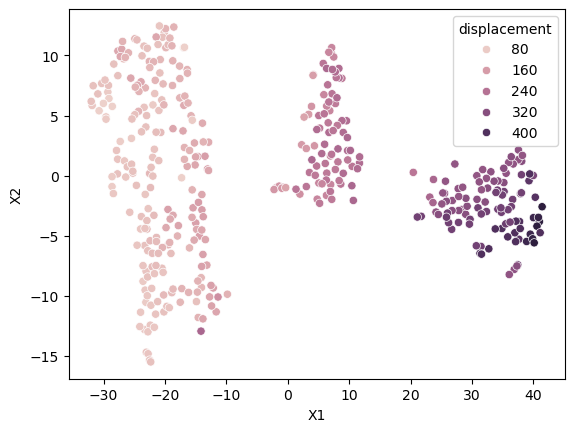

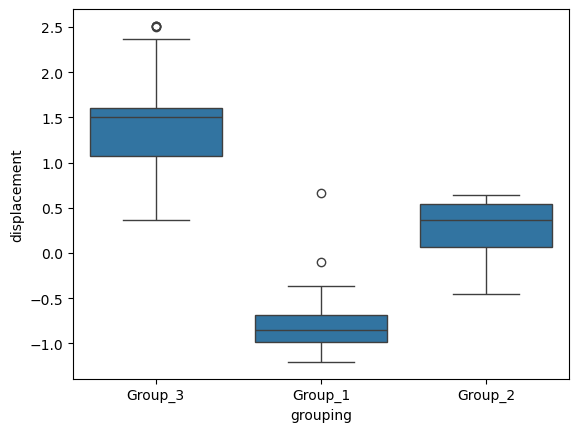

In [121]:
# Visualising clusters using scatterplot and boxplot with regards to displacement.
plt.figure()
sns.scatterplot(x = 'X1', y = 'X2', data = scaled_df_tsne, hue = df.displacement)
plt.figure()
sns.boxplot(x = scaled_df_tsne['grouping'], y = scaled_df['displacement']);

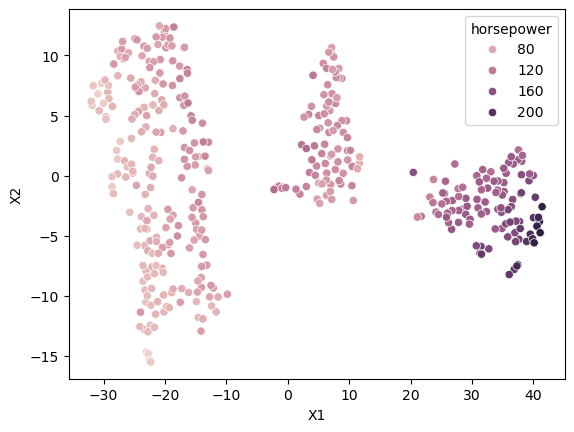

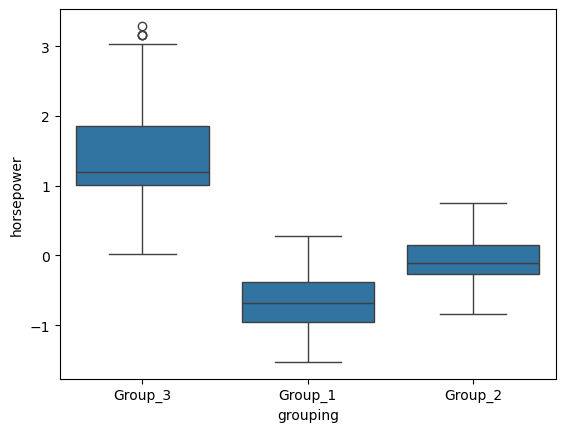

In [123]:
# Visualising clusters using scatterplot and boxplot with regards to horsepower.
plt.figure()
sns.scatterplot(x = 'X1', y = 'X2', data = scaled_df_tsne, hue = df.horsepower)
plt.figure()
sns.boxplot(x = scaled_df_tsne['grouping'], y = scaled_df['horsepower']);

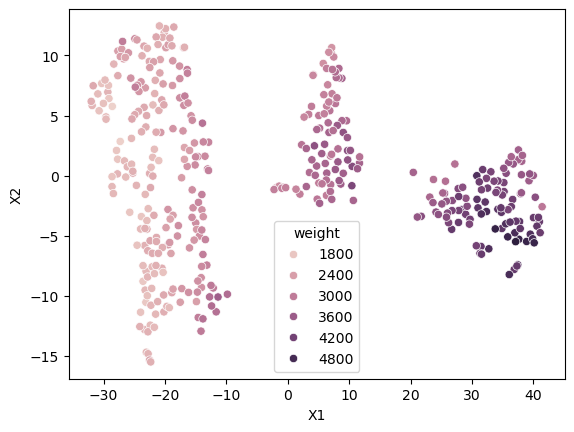

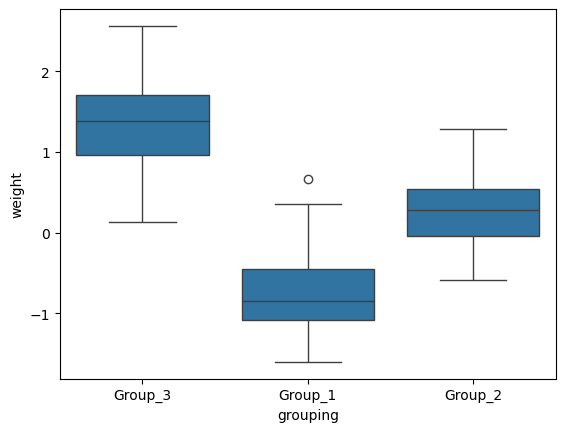

In [125]:
# Visualising clusters using scatterplot and boxplot with regards to weight.
plt.figure()
sns.scatterplot(x = 'X1', y = 'X2', data = scaled_df_tsne, hue = df.weight)
plt.figure()
sns.boxplot(x = scaled_df_tsne['grouping'], y = scaled_df['weight']);

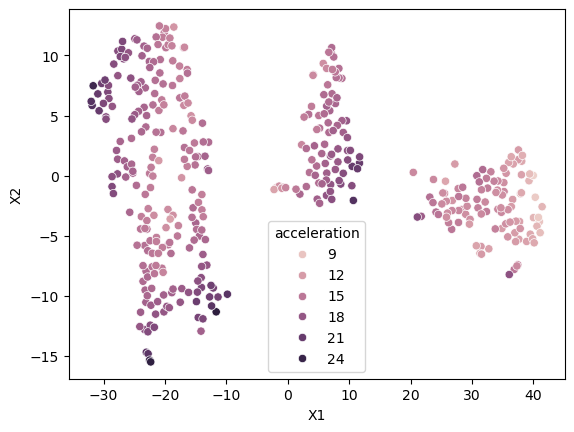

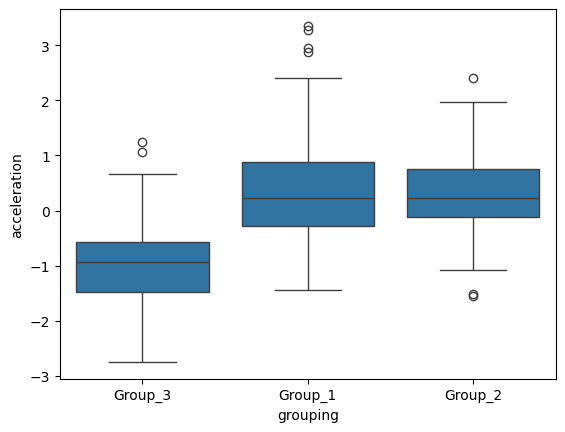

In [127]:
# Visualising clusters using scatterplot and boxplot with regards to acceleration.
plt.figure()
sns.scatterplot(x = 'X1', y = 'X2', data = scaled_df_tsne, hue = df.acceleration)
plt.figure()
sns.boxplot(x = scaled_df_tsne['grouping'], y = scaled_df['acceleration']);

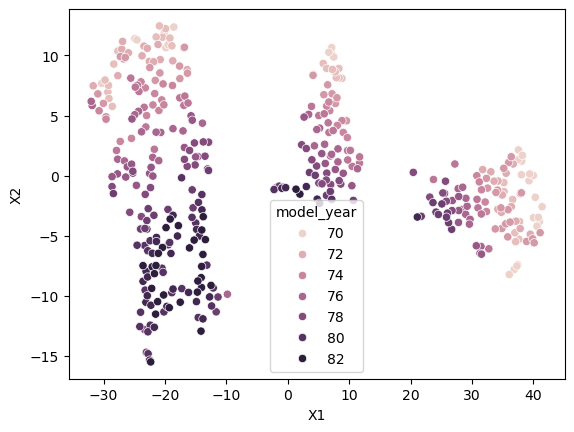

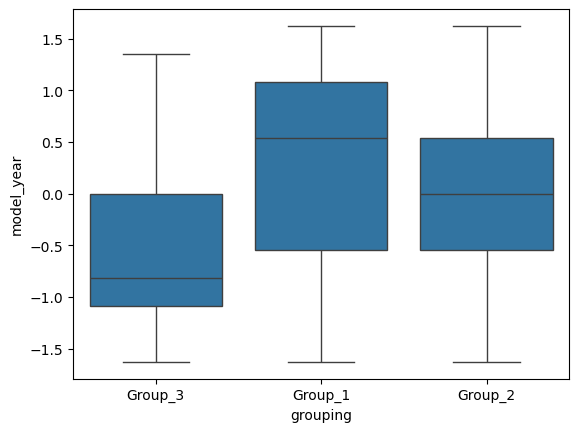

In [129]:
# Visualising clusters using scatterplot and boxplot with regards to model year.
plt.figure()
sns.scatterplot(x = 'X1', y = 'X2', data = scaled_df_tsne, hue = df.model_year)
plt.figure()
sns.boxplot(x = scaled_df_tsne['grouping'], y = scaled_df['model_year']);

**Observations:**
- Group 1: Features high mpg, low number of cylinders, low displacement, low horsepower, low weight, mix of high and low acceleration, and a mix of model years.
    - Seems to be a more "everyday" car with high mpg as the primary feature. These cars would also be lighter and not have muscle car features e.g. horsepower and cylinders.
- Group 2: Features lower mpg, medium number of cylinders, medium displacement, low/medium horsepower, medium weight, mix of high and low acceleration, and a mix of model years.
    - Seems to be a more sporty version of the "everyday" car e.g. with lower mpg but also low/medium horsepower.
- Group 3: Features lower mpg, high number of cylinders, high displacement, high horsepower, high weight, mix of medium and low acceleration, and a mix of model years.
    - Seems to be a muscle car with many cylinders, high horsepower, high displacement, and high weight.

## **Actionable Insights and Recommendations**

- There are three groups of vintage cars: the "everyday" car, the sportier "everyday" car, and the muscle car.
    - To target customers effectively, we need to identify which group of cars they are interested in. To do so, we can ask them questions when they enter the dealership such as:
        - What cars have you driven in the past? (assuming they are looking for a similar car, we can find out which group their previous cars fall under and recommend cars from the same group)
        - Are you looking to display your car or drive it around?
        - Would you prefer a car with high miles per gallon (mpg) or high horsepower? (recommend group 1 for the former, recommend group 3 for the latter, recommend group 2 if somewhere in between or no preference)
    - Each group has a good mix of model years. Therefore, we should emphasise to the customer that no matter what model year they are looking for, we have options that will be suitable for their needs.